In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [383]:
date = "NOV05"
chainSGN = ROOT.TChain("events")
chainBKG = ROOT.TChain("events")

chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, 1039, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_{1}_2018.root".format(date, "Phi3Cat"))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_{1}_2018.root".format(date, "Phi3Cat"))

dfSGN = ROOT.RDataFrame(chainSGN)
dfBKG = ROOT.RDataFrame(chainBKG)

filter = "HCandMass > 100 && HCandMass < 160"
filter += " && !TMath::IsNaN(goodMeson_massErr[0]) && !TMath::IsNaN(sigmaHCandMass_Rel2)"

dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated").Filter(filter))
dfBKG = (dfBKG.Define("scale", "w*lumiIntegrated").Filter(filter))

chainSGN_MVA = ROOT.TChain("TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_31_0.root/dataset/TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_31_1.root/dataset/TestTree")
chainSGN_MVA.Add("/data/submit/pdmonte/TMVA_disc/rootVars/disc_phi_GF_31_2.root/dataset/TestTree")
df_MVA = ROOT.RDataFrame(chainSGN_MVA)
dfSGN_MVA = (df_MVA.Filter("classID == 0"))
dfBKG_MVA = (df_MVA.Filter("classID == 1"))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


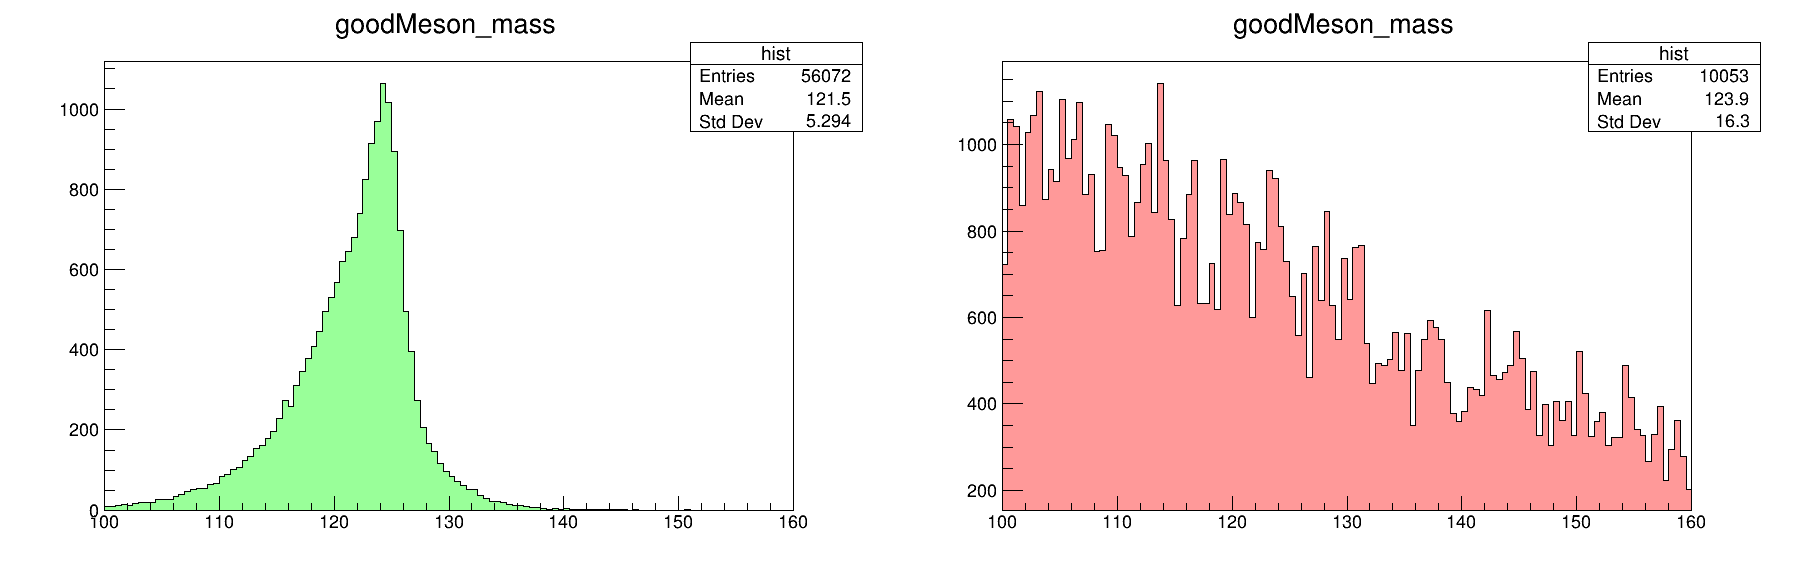

In [384]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 120, 100, 160

p = canvas.cd(1)
h = dfSGN.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.SetLineColor(ROOT.kBlack)
h.Draw("hist")

p = canvas.cd(2)
hb = dfBKG.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass", "scale")
hb.SetFillColor(ROOT.kRed-9)
hb.SetLineColor(ROOT.kBlack)
hb.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


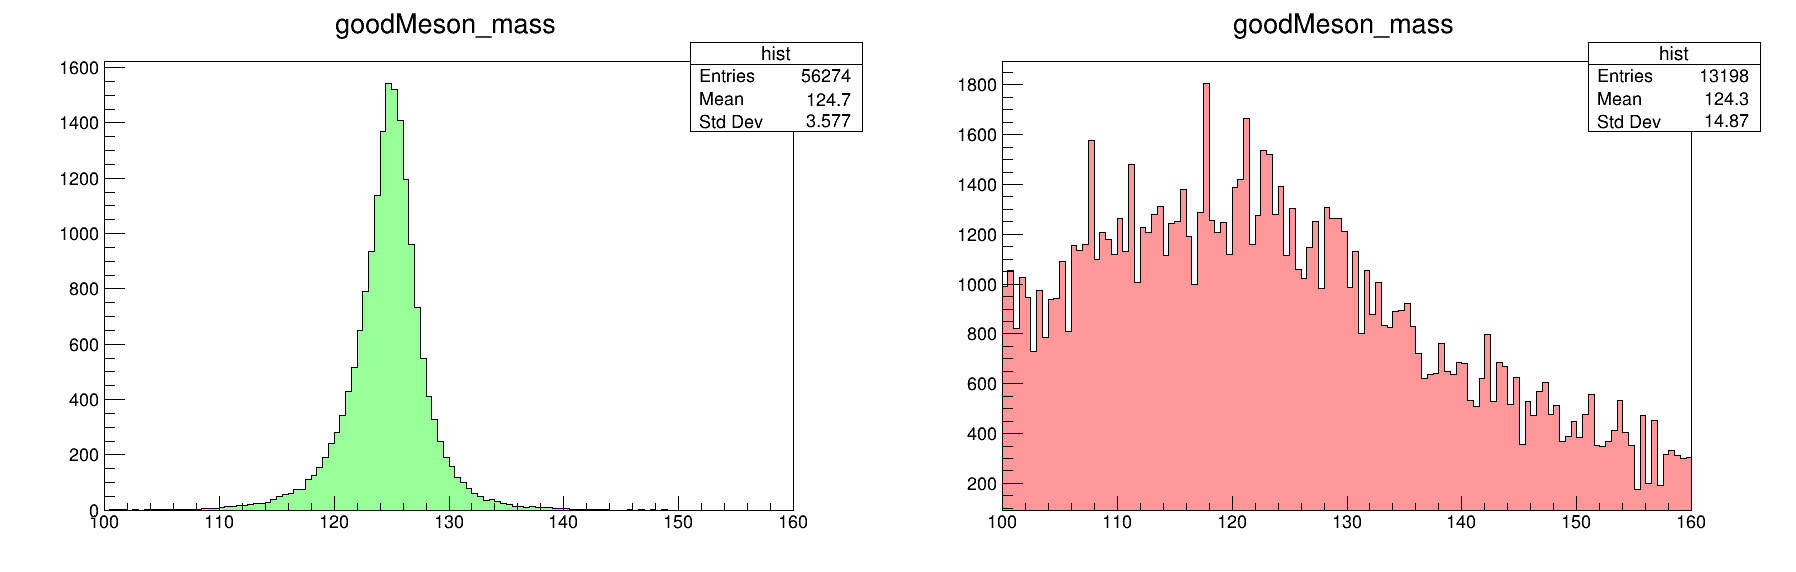

In [385]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 120, 100, 160

p = canvas.cd(1)
hCMSig = dfSGN_MVA.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMSig.SetFillColor(ROOT.kGreen-9)
hCMSig.SetLineColor(ROOT.kBlack)
hCMSig.Draw("hist")

p = canvas.cd(2)
hCMBkg = dfBKG_MVA.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMBkg.SetFillColor(ROOT.kRed-9)
hCMBkg.SetLineColor(ROOT.kBlack)
hCMBkg.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


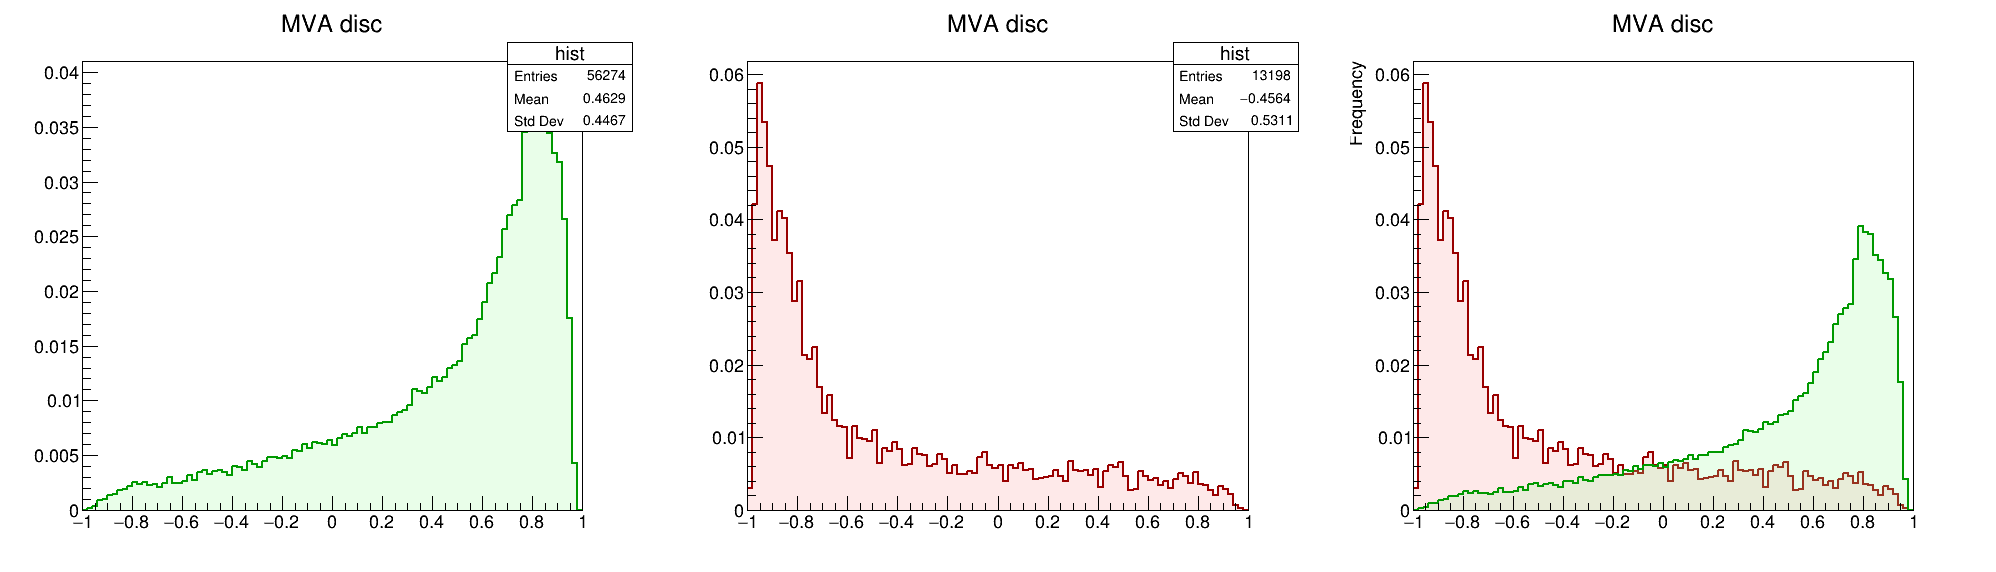

In [386]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 600)
canvas.Divide(3, 1)

nbins, xlow, xhigh = 100, -1, 1

p = canvas.cd(1)
hs = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hs.SetFillColorAlpha(ROOT.kGreen-9, 0.20)
hs.SetLineColor(ROOT.kGreen+2)
hs.SetLineWidth(2)
hs.SetFillStyle(4050)
hs.Draw("hist")

p = canvas.cd(2)
hb = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hb.SetFillColorAlpha(ROOT.kRed-9, 0.20)
hb.SetLineColor(ROOT.kRed+2)
hb.SetLineWidth(2)
hb.SetFillStyle(4050)
hb.Draw("hist")

p = canvas.cd(3)

hb.Scale(1/hb.Integral())
hs.Scale(1/hs.Integral())

stack = ROOT.THStack("stack", "MVA disc")
stack.Add(hb.GetValue())
stack.Add(hs.GetValue())
stack.Draw("hist nostack")
stack.GetYaxis().SetTitle("Frequency")

canvas.Draw()

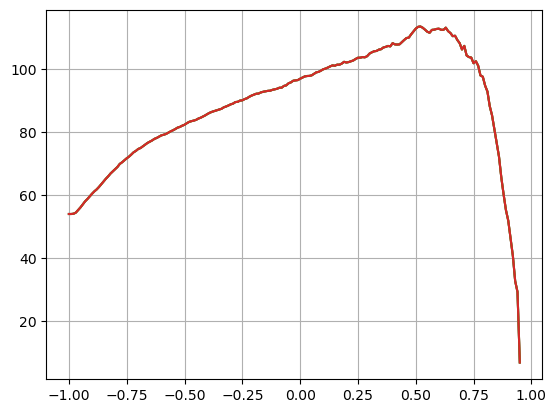

-1.0 54.080873023599224
0.5200000000000014 113.59772192831295
0.5200000000000014 113.59772192831295
0.5200000000000014 113.59772192831295
0.5200000000000014 113.59772192831295
Significance improvement: 110.05156828504306	 Limit reduction: -52.392642998838014
sgnEff: 0.5856526264273638
bkgEff: 0.0777370997447114


In [387]:
nbins, xlow, xhigh = 1000, -1, 1

hs = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hb = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")

hsB = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hbB = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")

hsC = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hbC = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")

hsD = dfSGN_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")
hbD = dfBKG_MVA.Histo1D(("hist", "MVA disc", nbins, xlow, xhigh), "BDTG_A", "scale")

#.Integral(h1.FindBin(xlow), h1.FindBin(xhigh))
nbins, xlow, xhigh = 100, -1, 0.95
step = 0.01
vals = np.arange(xlow, xhigh+step, step)
significances = []
significancesB = []
significancesC = []
significancesD = []
for v in vals:
    s = hs.Integral(hs.FindBin(v), hs.FindBin(xhigh))
    b = hb.Integral(hb.FindBin(v), hb.FindBin(xhigh))
    significances.append(0 if b == 0 else s/np.sqrt(b))

    s = hsB.Integral(hsB.FindBin(v), hsB.FindBin(xhigh))
    b = hbB.Integral(hbB.FindBin(v), hbB.FindBin(xhigh))
    significancesB.append(0 if b == 0 else s/np.sqrt(b))

    s = hsC.Integral(hsC.FindBin(v), hsC.FindBin(xhigh))
    b = hbC.Integral(hbC.FindBin(v), hbC.FindBin(xhigh))
    significancesC.append(0 if b == 0 else s/np.sqrt(b))

    s = hsD.Integral(hsD.FindBin(v), hsD.FindBin(xhigh))
    b = hbD.Integral(hbD.FindBin(v), hbD.FindBin(xhigh))
    significancesD.append(0 if b == 0 else s/np.sqrt(b))


plt.plot(vals, significances)
plt.plot(vals, significancesB)
plt.plot(vals, significancesC)
plt.plot(vals, significancesD)
plt.grid()
plt.show()

print(vals[0], significances[0])
print(vals[significances.index(max(significances))], max(significances))
print(vals[significancesB.index(max(significancesB))], max(significancesB))
print(vals[significancesC.index(max(significancesC))], max(significancesC))
print(vals[significancesD.index(max(significancesD))], max(significancesD))
sigImpr =  max(significances)/significances[0]
print("Significance improvement: {}\t Limit reduction: {}".format((sigImpr-1)*100, (1/sigImpr-1)*100))
sgnEff = hs.Integral(hs.FindBin(vals[significances.index(max(significances))]), hs.FindBin(xhigh))/hs.Integral(hs.FindBin(xlow), hs.FindBin(xhigh))
bkgEff = hb.Integral(hb.FindBin(vals[significances.index(max(significances))]), hb.FindBin(xhigh))/hb.Integral(hb.FindBin(xlow), hb.FindBin(xhigh))
print("sgnEff: {}".format(sgnEff))
print("bkgEff: {}".format(bkgEff))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


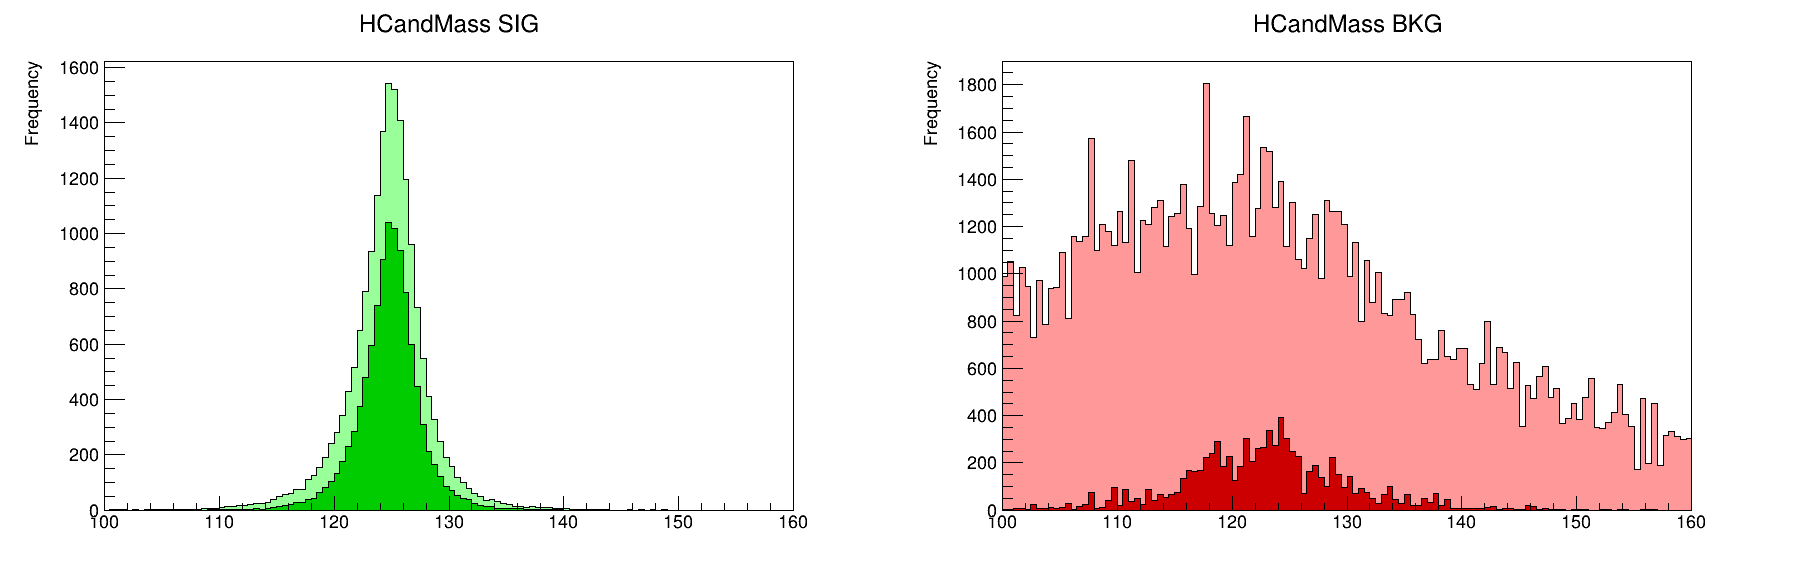

In [388]:
thr = vals[significances.index(max(significances))]
#thr = 0.0

canvas = ROOT.TCanvas("canvas", "canvas", 1800, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 120, 100, 160

hCMSigCUT = dfSGN_MVA.Filter("BDTG_A > {}".format(thr)).Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMSigCUT.SetFillColor(ROOT.kGreen+1)
hCMSigCUT.SetLineColor(ROOT.kBlack)

hCMBkgCUT = dfBKG_MVA.Filter("BDTG_A > {}".format(thr)).Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMBkgCUT.SetFillColor(ROOT.kRed+1)
hCMBkgCUT.SetLineColor(ROOT.kBlack)

p = canvas.cd(1)

stack = ROOT.THStack("stack", "HCandMass SIG")
stack.Add(hCMSig.GetValue())
stack.Add(hCMSigCUT.GetValue())
stack.Draw("hist nostack")
stack.GetYaxis().SetTitle("Frequency")

p = canvas.cd(2)

stack2 = ROOT.THStack("stack", "HCandMass BKG")
stack2.Add(hCMBkg.GetValue())
stack2.Add(hCMBkgCUT.GetValue())
stack2.Draw("hist nostack")
stack2.GetYaxis().SetTitle("Frequency")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


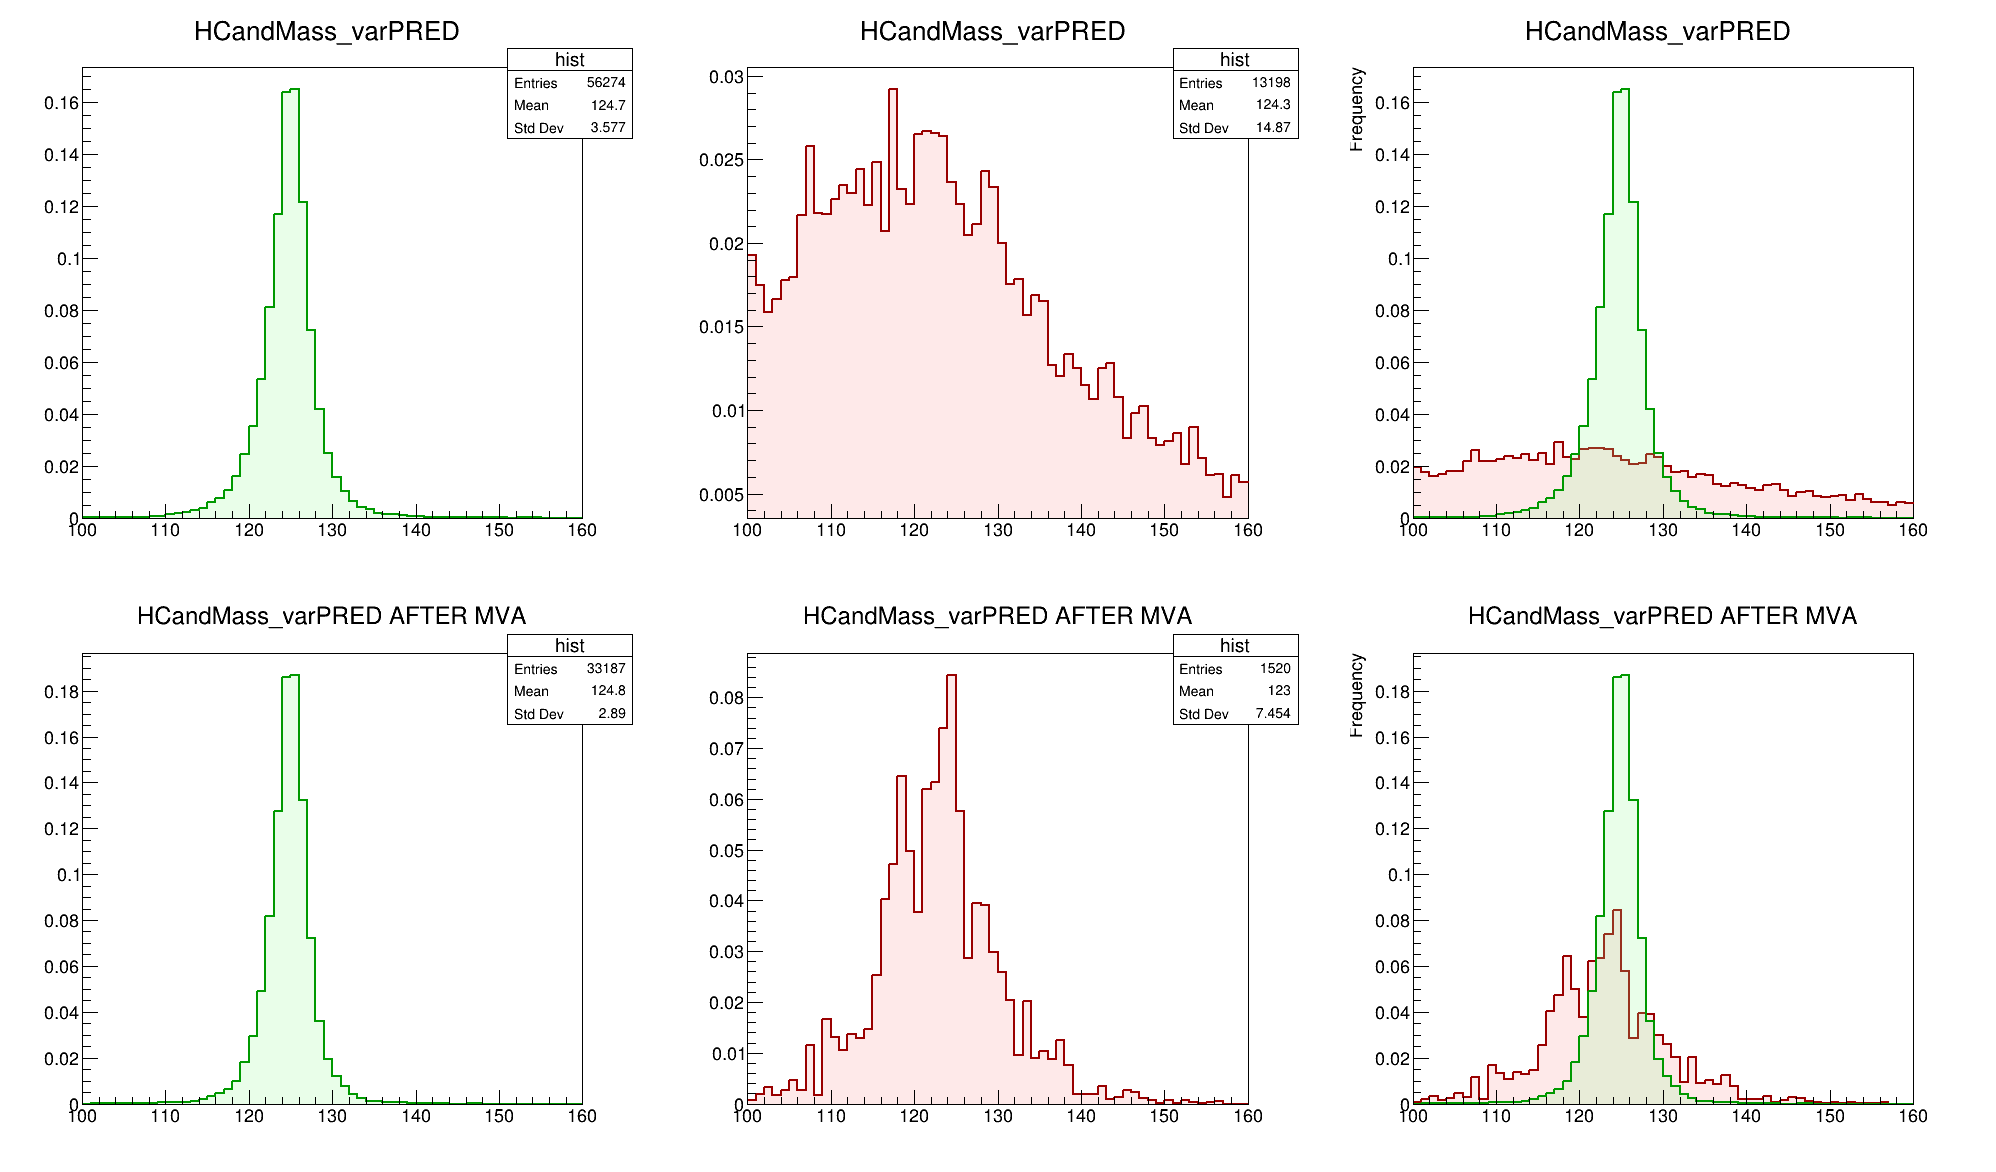

In [389]:
canvas = ROOT.TCanvas("canvas", "canvas", 2000, 1200)
canvas.Divide(3, 2)

nbins, xlow, xhigh = 60, 100, 160

p = canvas.cd(1)
hCMSig = dfSGN_MVA.Histo1D(("hist", "HCandMass_varPRED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMSig.SetFillColorAlpha(ROOT.kGreen-9, 0.20)
hCMSig.SetLineColor(ROOT.kGreen+2)
hCMSig.SetLineWidth(2)
hCMSig.SetFillStyle(4050)
hCMSig.Draw("hist")

p = canvas.cd(2)
hCMBkg = dfBKG_MVA.Histo1D(("hist", "HCandMass_varPRED", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMBkg.SetFillColorAlpha(ROOT.kRed-9, 0.20)
hCMBkg.SetLineColor(ROOT.kRed+2)
hCMBkg.SetLineWidth(2)
hCMBkg.SetFillStyle(4050)
hCMBkg.Draw("hist")

p = canvas.cd(3)

hCMBkg.Scale(1/hCMBkg.Integral())
hCMSig.Scale(1/hCMSig.Integral())

stack = ROOT.THStack("stack", "HCandMass_varPRED")
stack.Add(hCMBkg.GetValue())
stack.Add(hCMSig.GetValue())
stack.Draw("hist nostack")
stack.GetYaxis().SetTitle("Frequency")


p = canvas.cd(4)
hCMSigCUT = dfSGN_MVA.Filter("BDTG_A > {}".format(thr)).Histo1D(("hist", "HCandMass_varPRED AFTER MVA", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMSigCUT.SetFillColorAlpha(ROOT.kGreen-9, 0.20)
hCMSigCUT.SetLineColor(ROOT.kGreen+2)
hCMSigCUT.SetLineWidth(2)
hCMSigCUT.SetFillStyle(4050)
hCMSigCUT.Draw("hist")

p = canvas.cd(5)
hCMBkgCUT = dfBKG_MVA.Filter("BDTG_A > {}".format(thr)).Histo1D(("hist", "HCandMass_varPRED AFTER MVA", nbins, xlow, xhigh), "HCandMass_varPRED", "scale")
hCMBkgCUT.SetFillColorAlpha(ROOT.kRed-9, 0.20)
hCMBkgCUT.SetLineColor(ROOT.kRed+2)
hCMBkgCUT.SetLineWidth(2)
hCMBkgCUT.SetFillStyle(4050)
hCMBkgCUT.Draw("hist")

p = canvas.cd(6)

hCMBkgCUT.Scale(1/hCMBkgCUT.Integral())
hCMSigCUT.Scale(1/hCMSigCUT.Integral())

stack2 = ROOT.THStack("stack", "HCandMass_varPRED AFTER MVA")
stack2.Add(hCMBkgCUT.GetValue())
stack2.Add(hCMSigCUT.GetValue())
stack2.Draw("hist nostack")
stack2.GetYaxis().SetTitle("Frequency")

canvas.Draw()